# Text-guided image-inpainting

The [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline) allows you to edit specific parts of an image by providing a mask and a text prompt. It uses a version of Stable Diffusion, like [`runwayml/stable-diffusion-inpainting`](https://huggingface.co/runwayml/stable-diffusion-inpainting) specifically trained for inpainting tasks.

Get started by loading an instance of the [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline):

In [ ]:
!pip install diffusers transformers ftfy accelerate

import PIL
import torch
from io import BytesIO
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt
from diffusers import StableDiffusionInpaintPipeline

In [ ]:


pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

(-0.5, 4499.5, 3374.5, -0.5)

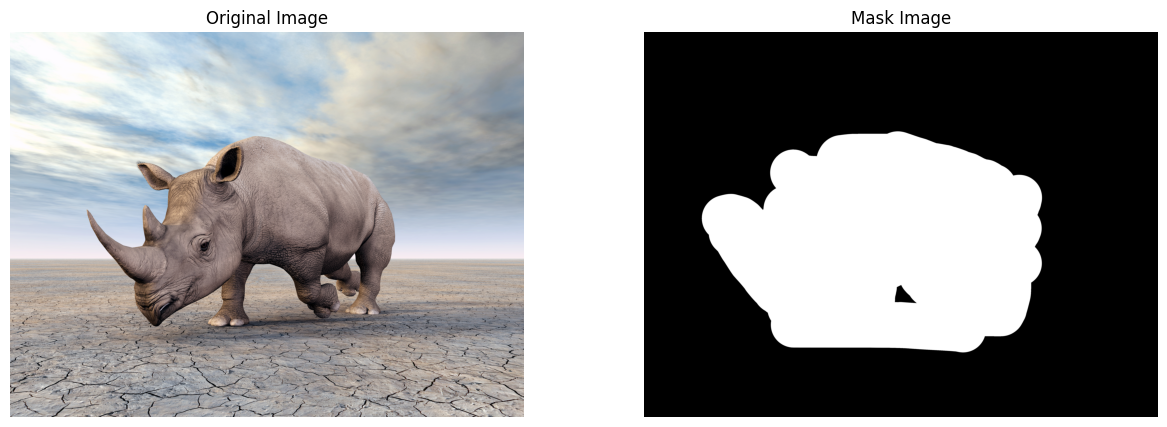

In [11]:
init_image =  load_image("/content/Rhinoceros_LIL_53344.jpeg")
mask_image =  load_image("/content/Rhinoceros_LIL_53344_mask.png")

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

Now you can create a prompt to replace the mask with something else:

In [ ]:
prompt = "cactus in the desert, realistic"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image

In [ ]:


# Plotting the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Generated Image')
axes[2].axis('off')

plt.show()